### **Task 1: ECG Signal Handling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt
#from scipy.signal import highpass_filter, lowpass_filter, butter, filtfilt

In [ ]:
#Load CSV
data = pd.read_csv("/content/sample_data/mitbih_test.csv")
signal = data.iloc[:, 0]
Fs = 250  # Hz (adjust if different)

# Design filters
def butter_highpass(cutoff, fs, order=4):
    b, a = butter(order, cutoff / (0.5 * fs), btype='high')
    return b, a

def butter_lowpass(cutoff, fs, order=4):
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')
    return b, a



In [ ]:
# Apply filters
b1, a1 = butter_highpass(0.5, Fs)
filtered_ecg = filtfilt(b1, a1, signal)

b2, a2 = butter_lowpass(40, Fs)
filtered_ecg = filtfilt(b2, a2, filtered_ecg)


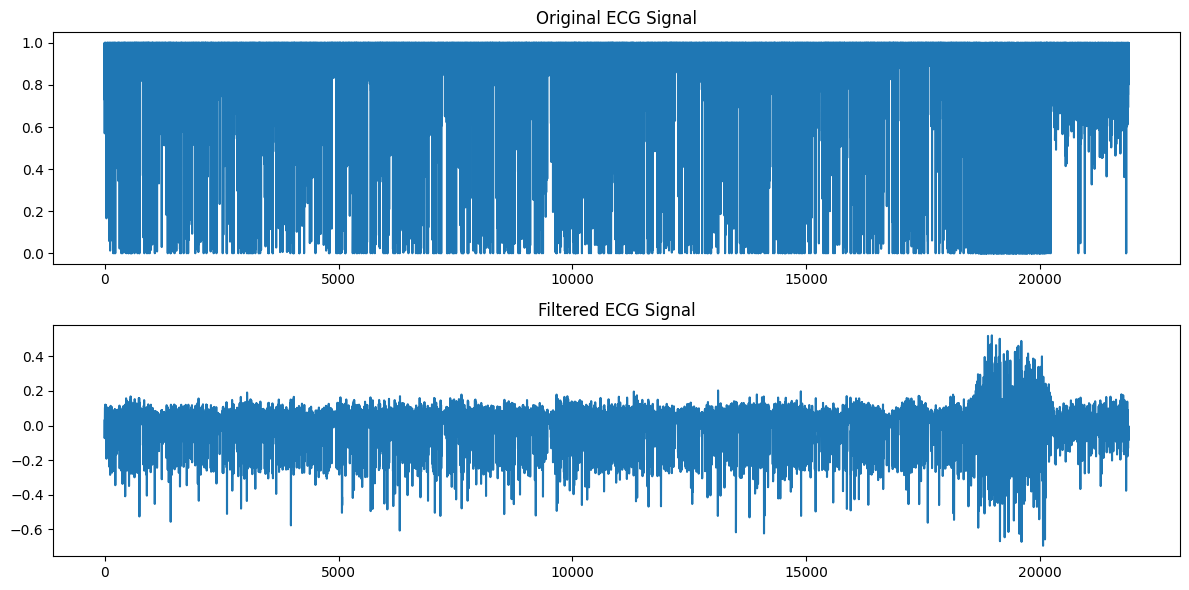

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title("Original ECG Signal")
plt.subplot(2, 1, 2)
plt.plot(filtered_ecg)
plt.title("Filtered ECG Signal")
plt.tight_layout()
plt.show()

#### **Result**:
The filtering process significantly improved the clarity of the ECG signal.

The denoised signal is suitable for further steps such as heartbeat detection, RR interval analysis, or feature extraction.

### **Task 2: EEG Signal Handling**

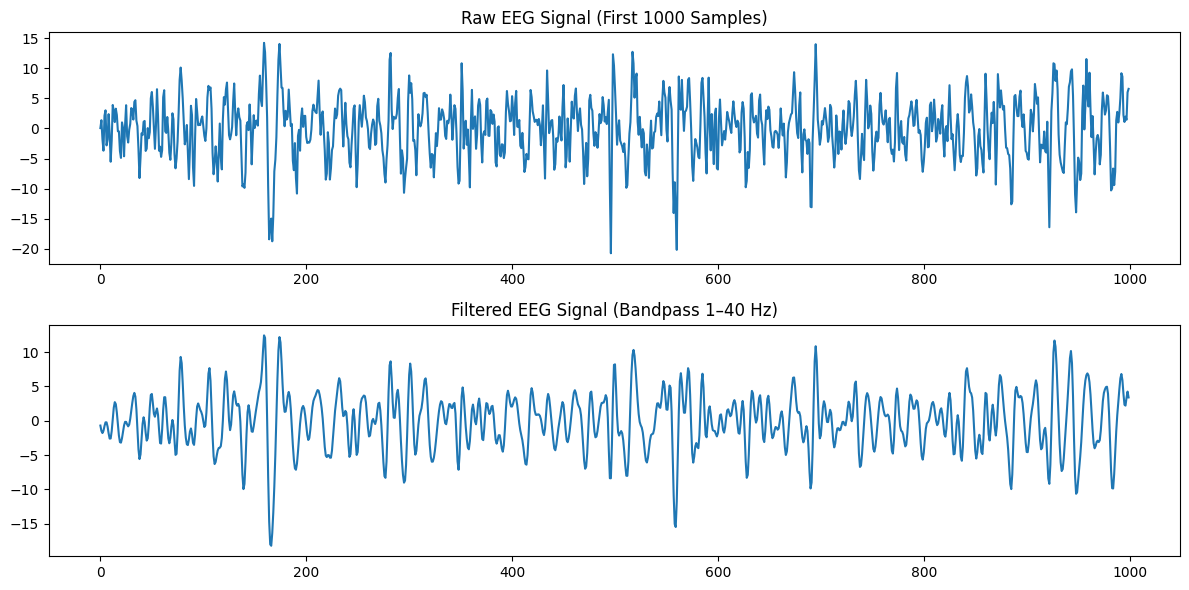

In [ ]:
# 1. Load EEG CSV
eeg_data = pd.read_csv("/content/sample_data/features_raw.csv")
eeg_signal = eeg_data.iloc[:, 0]

# Define bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')
    return b, a

b3, a3 = butter_bandpass(1, 40, Fs)
filtered_eeg = filtfilt(b3, a3, eeg_signal)

# Plot first 1000 samples
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(eeg_signal[:1000])
plt.title("Raw EEG Signal (First 1000 Samples)")
plt.subplot(2, 1, 2)
plt.plot(filtered_eeg[:1000])
plt.title("Filtered EEG Signal (Bandpass 1–40 Hz)")
plt.tight_layout()
plt.show()

#### **Result:**

The filtered EEG signal retains meaningful frequency components while suppressing irrelevant noise.

This enhances the quality for future tasks like brainwave analysis, event detection, or classification in BCI systems.